# Manipulación de Arrays con Numpy

### 1- Arrays en Numpy

A diferencia de las listas de Python, cuando creamos un array en Numpy, existe la restricción de que todos los elementos tienen que ser del mismo tipo.
Esto hace que los arrays de numpy sean **más eficientes**.


In [ ]:
import numpy as np

In [ ]:
# Lista de python
l = [1, 4, 2, 5, 3]

# Arreglo de enteros instanciado a partir de una lista:
np.array(l)

In [ ]:
# Instanciamos un array a partir de una lista literal
a = np.array([1, 4, 2, 5, 3])

# Atributo que indica el tipo de datos de los elementos del array
a.dtype

In [ ]:
# Si la lista de python tiene integers y floats, 
# el array de Numpy transforma todo en float para tener un solo tipo.
py_list = [3.14, 4, 2, 3]
np.array(py_list)

In [ ]:
np.array(py_list).dtype



Para crear arrays desde cero, lo más eficiente es hacerlo con los métodos propios de Numpy. Puedo crear arrays de ceros, de unos, de una secuencia, de valores aleatorios o de valores con una cierta **distribución estadística**, como por ejemplo la distribución normal.

##### Crear una Array de ceros

In [ ]:
# Crear un array de longitud 10 lleno con ceros
np.zeros(10, dtype=int)

#### Inicializar un array vacío

In [ ]:
# Aloca un espacio en memoria pero no la inicializa
my_array = np.empty([2, 2])
my_array

#### Crear un Array que contiene números con distribución normal

In [ ]:
# Puedo inicializar un array de números con distribución normal
# El primer parámetro es la media de la distribución
# El segundo parámetro es el desvío estándar
norm = np.random.normal(0, 1, 12)

In [ ]:
norm

In [ ]:
# También podemos crear una distribución normal 
# y asignarla a una matriz de dimensión n x m 
norm = np.random.normal(0, 1, (3,4))
norm

In [ ]:
# Opcionalmente, puedo utilizar el método seed() 
# para que las elecciones aleatorias sean reproducibles
np.random.seed(0) 

norm = np.random.normal(0, 1, (3,4))
norm


### Atributos de un array


In [ ]:
# Array de 3 dimensiones con valores aleatorios entre 0 y 9
x3 = np.random.randint(10, size=(3, 4, 5))  
print (x3)

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)

# El tamaño de cada elemento del array. Depende del tipo de datos.  
print("itemsize:", x3.itemsize, "bytes") 

# El tamaño de todo el array. Se calcula de esta forma: itemsize * size
print("nbytes:", x3.nbytes, "bytes") 

## 2- Selección de elementos de un Array

Es un problema común querer seleccionar los elementos de un array de acuerdo a algún criterio. 
Numpy nos brinda tres formas de acceder <b> de forma eficiente </b> a los elementos de un array:
* Array Slicing
* Fancy Indexing
* Boolean Indexing

### 2-1 Array Slicing 

#### Slicing sobre una dimensión

El slicing es similar al de las listas de python [start:stop:step]. El índice stop no se incluye pero el start sí se incluye. Por ejemplo [1:3] incluye al índice 1 pero no al 3.
Funciona como un intervalo semicerrado [1,3).


In [ ]:
# Sobre un array de una dimension
one_d_array = np.arange(10)
one_d_array

In [ ]:
# Start = 1:  empezamos por el segundo elemento
# Stop: No está definido, entonces llegamos hasta el final.
# Step: El paso o distacia entre los elementos que voy a tomar.
one_d_array[1::2]  

In [ ]:
# Para invertir el orden del array, podemos usar Step = -1
one_d_array[::-1]

In [ ]:
# Si queremos hacer slicing en orden invertido

one_d_array[7:4:-1]  

#### Slicing sobre arrays de más  dimensiones


Con la misma lógica, se puede seleccionar en dos dimensiones

In [ ]:
np.random.seed(0)
two_d_array = np.random.randint(10, size=(3, 4))
two_d_array

Cuando tenemos más de una dimensión, podemos hacer slicing sobre cada una de ellas separándolas con una coma. 

In [ ]:
# Acceder a una columna
# Aquí los dos puntos ( : ) indican que accedemos a todos los elementos
# de cada fila y el cero después de la coma indica 
# que sólamente lo hacemos para la columna 0 (la primera).

two_d_array[:, 0]

In [ ]:
# Acceder a una fila
two_d_array[2, :]

In [ ]:
# Otra forma de acceder a una fila
two_d_array[2]

In [ ]:
# Un slice de dos columnas
two_d_array[:, 1:3]

In [ ]:
# Todas las columnas listadas en orden inverso
two_d_array[:, ::-1]

### 2-2 Fancy Indexing

Esta técnica consiste en generar listas que contienen los índices de los elementos que queremos seleccionar y utilizar éstas para indexar.

In [ ]:
# Instanciamos un generador de números pseudo-aleatorios
rand = np.random.RandomState(42)

In [ ]:
# Pedimos 10 enteros entre 0 y 99
x = rand.randint(100, size=10)
print(x)

Puedo acceder a un conjunto de elementos creando una lista con los índices que quiero acceder

In [ ]:
ind = [3, 7, 4]
x[ind]

También se puede optar por una selección por fila y columna

In [ ]:
# Creamos una matriz de 3 x 4
X = np.arange(12).reshape((3, 4))
X

In [ ]:
# Un array de índices para acceder a filas determinadas
row = np.array([0, 2])
X[row, :]

In [ ]:
# Accedemos a posiciones específicas de la matriz. 
# Los índices están dados por los arrays row y col
col = np.array([2, 3])
X[row, col]

#### Ejemplo de aplicación de Fancy Indexing: Seleccionar puntos al azar

In [ ]:
rand = np.random.RandomState(42)

# Parámetros de la distribución normal multivariada
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

# Tomamos 100 puntos (son muestras de dos dimensiones)
X = rand.multivariate_normal(mean, cov, 100)
X.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  

plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
# Selecciono 20 de los 100 (X.shape[0] = 100) sin reposición
indices = np.random.choice(X.shape[0], 20, replace=False)
indices # Array de índices

In [ ]:
selection = X[indices]  # fancy indexing!!
selection.shape

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red');


### 2-2 Boolean Indexing

Esta técnica se basa en crear lo que se llama una "máscara booleana", que es una lista de valores True y False que sirve para seleccionar sólo los elementos cuyo índice coincide con un valor True.  

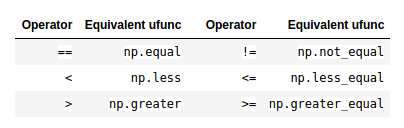

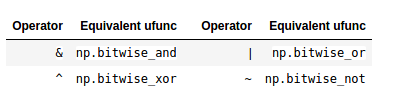

#### Ejemplo de aplicación boolean indexing: contar días de lluvia

Tenemos un dataset que representa la cantidad de precipitaciones del 2014 en la ciudad de Seattle

In [ ]:
import numpy as np
import pandas as pd

# Usamos pandas para extraer los datos como un array de Numpy
# Nota: modificar el path con la ruta correcta al archivo csv
r_df = pd.read_csv('Seattle2014.csv')

# Indexamos una columna (Series de Pandas)
r_s = r_df['PRCP']

# Transformamos la Series en un array de Numpy
rainfall = r_s.values
print ("type:", type (rainfall))
print ("shape:", rainfall.shape)
print (rainfall)

También exploramos este array utilizando un histograma. La funcionalidad la da la librería matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [ ]:
plt.hist(rainfall, bins = 40);

In [ ]:
# Aplicamos una condición booleana sobre un array de Numpy y
# nos devuelve una nuevo array con True o False.
# Es una vectorización de la operación de comparación

print (rainfall == 0)

**En lugar de hacer un loop** y definir un contador, vamos a describir los valores que nos interesan de este dataset utilizando Numpy:



In [ ]:
# Veamos primero este comportamiento de los booleanos en python nativo
print("Suma de Booleans: ", True + False + True)

# Suma vectorizada de valores booleanos con Numpy,
# cuenta cantidad de ocurrencias del valor True en la lista
print("Suma de numpy: ", np.sum([True, False, True, True]))

In [ ]:
print("Cantidad de días sin lluvia:      ", np.sum(rainfall == 0))
print("Cantidad de días con lluvia:      ", np.sum(rainfall != 0))
print("Cantidad de días con más de 100 cm de lluvia:", np.sum(rainfall > 100))
print("Cantidad de días con lluvia, pero no mayor a 100cm  :", np.sum((rainfall > 0) & (rainfall < 100)))

## 3 -  Numpy Universal Functions

Una de las ventajas de usar Numpy es que permite aplicar **operaciones vectorizadas**. 

Cuando determinadas operaciones se aplican sobre todos los elementos de un array, esta tarea se puede paralelizar y la computadora la completa en un tiempo mucho menor que si aplicásemos un loop y operásemos sobre cada uno de los elementos.

Para esto sirven las UFuncs (Universal Functions) de Numpy


##### Ejemplo: calcular el recíproco (1/x) de cada elemento de un array

In [ ]:
# Definimos un array de gran tamaño
big_array = np.random.randint(1, 100, size=1000000)

# Enfoque tradicional

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

%timeit compute_reciprocals(big_array)

In [ ]:
# Enfoque Numpy

%timeit (1.0 / big_array)

### Agregación, Max y Min con Numpy

En Numpy se implementan de forma más eficiente los métodos que trabajan sobre los elementos del array:

In [ ]:
# Aclaración: np.random nos da acceso a toda la funcionalidad del módulo random dentro del módulo numpy. 

big_array = np.random.rand(100000)

%timeit sum(big_array)
%timeit np.sum(big_array)

#### En arrays de varias dimensiones

In [ ]:

my_array = np.random.random((3, 4))
print(my_array)

In [ ]:
# En Numpy, cuando se ejecutan funciones que reducen la dimensionalidad, axis representa el eje que se va a reducir
# En una matriz de dos dimensiones el 0 representa 
# el eje de las filas, y el 1 el eje de las columnas

print("Suma de toda la matriz: ", M.sum())
print("Mínimos de cada columna: ", M.min(axis=0))
print("Máximo de cada fila: ", M.max(axis=1))
print("Suma de cada fila: ", M.sum(axis=1))

#### Ejemplo de aplicación de operaciones vectorizadas.

In [ ]:
# Vamos a usar la librería Pandas únicamente para importar un archivo csv 
import pandas as pd

# Modificamos el path para acceder al archivo con los datos
data = pd.read_csv('../Data/president_heights.csv')

# Indexamos un dataframe de pandas para extraer una columna.
# Nota: Más adelante estudiaremos los dataframes de Pandas en detalle 
c = data['height(cm)']

# Veamos los primeros valores de la columna (tipo Series en Pandas)
print (type(c))
c.head(10)

In [ ]:
# Instanciamos un array de Numpy a partir de la columna anterior
heights = np.array(c)

# Imprimimos los valores ordenados
print(np.sort(heights))

In [ ]:
# Percentiles
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

In [ ]:
# Importamos las librerías de visualización
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

# Configuramos parámetros estéticos por defecto
seaborn.set()

In [ ]:
# Tipo de visualización
plt.hist(heights)

# Títulos
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

# Mostramos el histograma
plt.show()

## 4- Broadcasting: Otra forma de vectorizar

En conjunto con las ufuncs, el broadcasting es una forma de aplicar operaciones sobre los datos sin tener que escribir loops "for" en Python nativo que resultan más lentos.

Recordemos que cuando operamos sobre arrays de las mismas dimensiones, se pueden hacer operaciones eficientes elemento a elemento.



In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

En el ejemplo de arriba, "a + b" es una operación eficiente porque "a" y "b" tienen la misma dimensionalidad y tamaño. 
Las reglas de "broadcasting" de Numpy, permiten que la operación siga siendo eficiente llevando los elementos involucrados a la misma dimensión y tamaño.

Veamos el siguiente ejemplo:

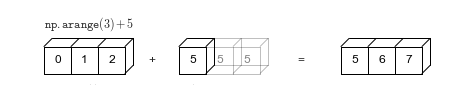

In [ ]:
a + 5

Veamos un ejemplo con otras dimensiones:

In [ ]:
#Recordemos el valor de "a"
a

In [ ]:
# Ahora queremos sumar el vector "a" con una matriz de dos dimensiones, 
# de tamaño 3x3 que contiene todos valores 1.
M = np.ones((3, 3))
M

Gráficamente, esto es lo que sucede:
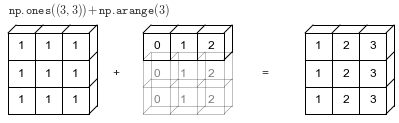

In [ ]:
M + a